<a href="https://colab.research.google.com/github/JuanManuelGutierrezG/new-repository/blob/main/height.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [5]:
# write the model 
def height(s,t,u,p):

    # state variables 
    h = s[0]

    # inputs
    Fi = u[0]
    F = u[1]

    # parameters 
    # rho
    A = p[0]

    # mass balance 
    dhdt = 1/A*(Fi - F)

    return dhdt

In [62]:
# estabilsh inputs
Fis = 0.5
Fs = 0.5
u = [Fis, Fs]

In [32]:
# establish parameters
A = 2
p = [A]

In [33]:
# integration time 
time = np.linspace(0,100,100)

In [39]:
# intial conditions 
hs = 0.5
s = [hs]

In [35]:
# solve ODEs
out = odeint(height, s, time, args=(u,p))

Text(0, 0.5, 'F (m3/min)')

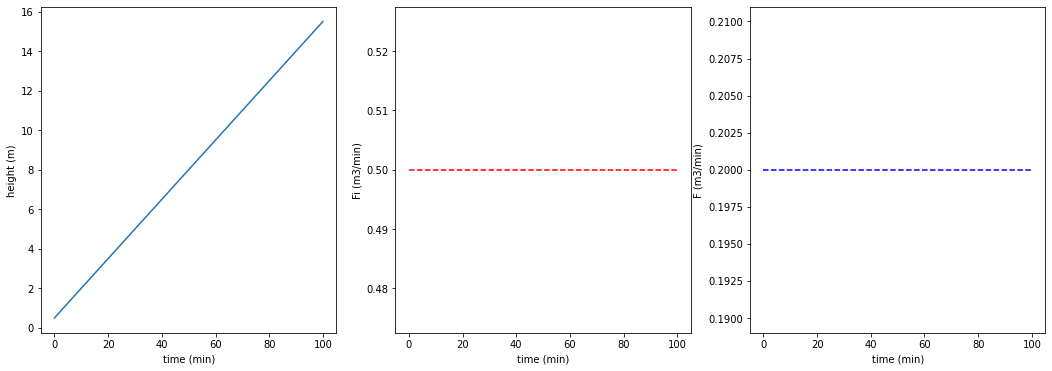

In [36]:
# show results 
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.plot(time, out)
plt.xlabel("time (min)")
plt.ylabel("height (m)")
plt.subplot(1,3,2)
plt.plot(time, np.ones(len(time))*Fis, "r--")
plt.xlabel("time (min)")
plt.ylabel("Fi (m3/min)")
plt.subplot(1,3,3)
plt.plot(time, np.ones(len(time))*Fs,"b--")
plt.xlabel("time (min)")
plt.ylabel("F (m3/min)")

### Análisis con $F_i$ variable 

In [72]:
# variable input 
Fi = np.ones(len(time))*Fis
Fi[25:50] = 2*Fis
Fi[50:75] = 0.5*Fis

In [68]:
# vector para guardar las alturas
h = np.ones(len(time))*hs
# condiciones inicial 
s = [hs]

In [74]:
for i in range(len(time) - 1):
    
    # actualizar tiempo de integración
    ts = [time[i], time[i+1]]

    # actualizar el flujo
    u[0] = Fi[i+1]

    # resolver EDOs
    out = odeint(height, s, ts, args= (u,p))

    # guardar resultados 
    h[i+1] = out[-1][0]

    # actualizar condiciones iniciales
    s = out[-1][0]

array([[3.65656566],
       [3.65656566]])

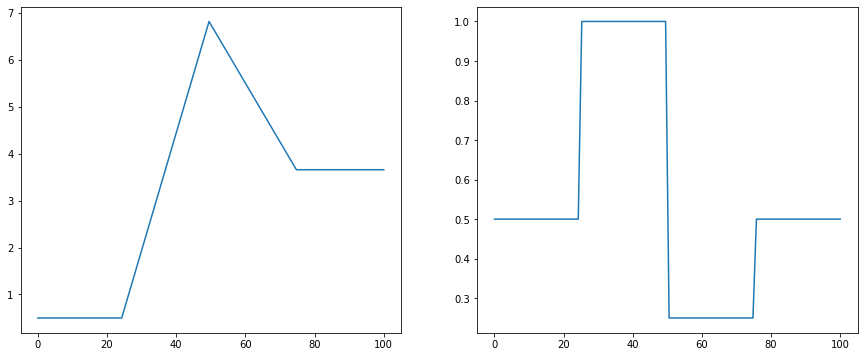

In [70]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(time, h)
plt.subplot(1,2,2)
plt.plot(time, Fi)